In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font="Helvetica")

**Figure 2: (A) PET target, (B) PET&DX target from ADNI**

In [ ]:
def barplot_comparision_ml(target, bs, df, metric, title):
    
    colors = ["#F8766D", "#a3a500", "#00bf7d", "#00b0f6", "#E76BF3"]
    custom = sns.set_palette(sns.color_palette(colors))

    plt.figure(figsize=(8, 8))
    ax = sns.barplot(x = 'Dataset',
                     y = metric,
                     hue = 'Model',
                     ci = 'sd',
                     data = df,
                     palette = custom)
    plt.axhline(y=bs, color='r', linestyle='dotted', label=f'Baseline model ({bs})')
    plt.legend(fontsize=14, loc='upper right')
    plt.ylim(0.0, 1.0)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    ax.xaxis.label.set_visible(False)
    plt.ylabel(f'{metric} obtained in test set', fontsize=16)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    plt.savefig(f'figures/figure2{title}.pdf', dpi=500)
    plt.savefig(f'figures/figure2{title}.png', dpi=500)

In [ ]:
pet_results = pd.read_csv('results/GNNs_comparison/2022_01_PET.csv')
pet_baseline = pet_results.iloc[60]
pet_results.drop([60], inplace=True)

barplot_comparision_ml('PET', pet_baseline['AUC'], pet_results, 'AUC', r"($\bf{A}$) PET")

In [ ]:
petdx_results = pd.read_csv('results/GNNs_comparison/2022_01_PETandDX.csv')
petdx_baseline = petdx_results.iloc[60]
petdx_results.drop([60], inplace=True)

barplot_comparision_ml('PET&DX', petdx_baseline['AUC'], petdx_results, 'AUC', r"($\bf{B}$) PET&DX")

**Figure 3: (A) PET target, (B) PET&DX target from ADNI**

In [ ]:
def barplot_comparision_others(target, bs, df, metric, title):
    
    colors = ["#E76BF3", "#9590ff", "#9590ff", "#9590ff", "#9590ff"]
    custom = sns.set_palette(sns.color_palette(colors))

    plt.figure(figsize=(6, 8))
    ax = sns.barplot(x = 'Dataset',
                     y = metric,
                     ci = 'sd',
                     data = df,
                     palette = custom)
    plt.axhline(y=bs, color='r', linestyle='dotted', label=f'Baseline model ({bs})')
    plt.legend(fontsize=14, loc='upper right')
    plt.ylim(0, 1.0)
    plt.xticks(fontsize=16, rotation=60)
    plt.yticks(fontsize=16)
    ax.xaxis.label.set_visible(False)
    plt.ylabel(f'{metric} obtained in test set', fontsize=16)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    
    plt.savefig(f'figures/figure3{title}.pdf', dpi=500)
    plt.savefig(f'figures/figure3{title}.png', dpi=500)

In [ ]:
pet_results = pd.read_csv('results/GNNs_other_networks/2022_01_PET_others.csv')
barplot_comparision_others('PET', 0.6894, pet_results, 'AUC', r"($\bf{A}$) PET")

In [ ]:
petdx_results = pd.read_csv('results/GNNs_other_networks/2022_01_PETandDX_others.csv')
barplot_comparision_others('PETandDX', 0.6825, petdx_results, 'AUC', r"($\bf{B}$) PET&DX")

**Supplementary tables - Models' classification metrics**

In [20]:
pet_models = pd.read_csv('results/GNNs_comparison/2022_01_PET.csv')
pet_grouped = pet_models.groupby(['Target', 'Dataset', 'Model']).agg({'ACC': ['mean', 'std'], 'PRE': ['mean', 'std'], 'REC': ['mean', 'std'], 'F1': ['mean', 'std'], 'AUC': ['mean', 'std']})
pet_grouped.to_csv('results/GNNs_comparison/2022_01_PET_AGG.csv')

In [21]:
petdx_models = pd.read_csv('results/GNNs_comparison/2022_01_PETandDX.csv')
petdx_grouped = petdx_models.groupby(['Target', 'Dataset', 'Model']).agg({'ACC': ['mean', 'std'], 'PRE': ['mean', 'std'], 'REC': ['mean', 'std'], 'F1': ['mean', 'std'], 'AUC': ['mean', 'std']})
petdx_grouped.to_csv('results/GNNs_comparison/2022_01_PETandDX_AGG.csv')

In [23]:
load_models = pd.read_csv('results/GNNs_LOAD/2022_03_LOAD.csv')
load_grouped = load_models.groupby(['Target', 'Dataset', 'Model']).agg({'ACC': ['mean', 'std'], 'PRE': ['mean', 'std'], 'REC': ['mean', 'std'], 'F1': ['mean', 'std'], 'AUC': ['mean', 'std']})
load_grouped.to_csv('results/GNNs_LOAD/2022_03_LOAD_AGG.csv')

In [24]:
pet_others = pd.read_csv('results/GNNs_other_networks/2022_01_PET_others.csv')
pet_others_grouped = pet_others.groupby(['Target', 'Dataset', 'Model']).agg({'ACC': ['mean', 'std'], 'PRE': ['mean', 'std'], 'REC': ['mean', 'std'], 'F1': ['mean', 'std'], 'AUC': ['mean', 'std']})
pet_others_grouped.to_csv('results/GNNs_other_networks/2022_01_PET_others_AGG.csv')

In [25]:
petdx_others = pd.read_csv('results/GNNs_other_networks/2022_01_PETandDX_others.csv')
petdx_others_grouped = petdx_others.groupby(['Target', 'Dataset', 'Model']).agg({'ACC': ['mean', 'std'], 'PRE': ['mean', 'std'], 'REC': ['mean', 'std'], 'F1': ['mean', 'std'], 'AUC': ['mean', 'std']})
petdx_others_grouped.to_csv('results/GNNs_other_networks/2022_01_PETandDX_others_AGG.csv')

**Supplementary Figure 1: LOAD target from TGEnII dataset**

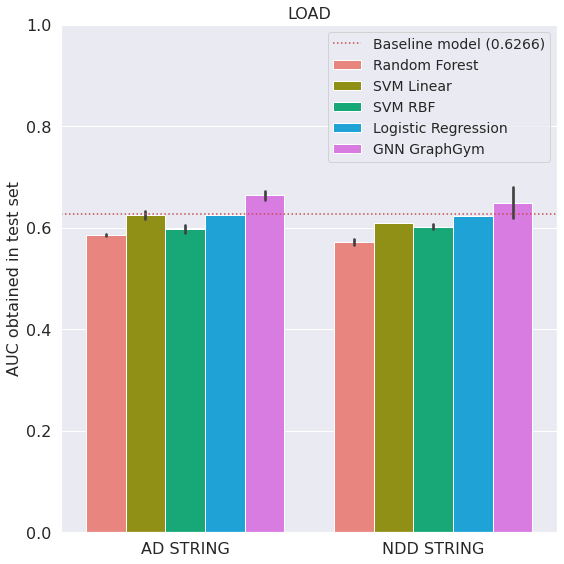

In [19]:
load_results = pd.read_csv('results/GNNs_LOAD/2022_03_LOAD.csv')
load_baseline = load_results.iloc[30]
load_results.drop([30], inplace=True)

barplot_comparision_ml('LOAD', load_baseline['AUC'], load_results, 'AUC', 'LOAD')